In [36]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para pré-processamento e divisão de dados
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Bibliotecas para os modelos de machine learning
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [17]:
df = pd.read_csv('emissoes_brasil.csv')

# **Emissão de gases no Brasil desde 1970 até 2019**

* Ano = Ano de observação
* Nivel_1 a Nivel_6 = Hierarquias da origem da emissão
* Tipo_emissão = Tipagem de emissão ou Remossão
* Gas = Tipo de gas emitido ou Removido
* Atividade_economica = tipo de atividade economica derivado do nive_1
* Produto = Produto derivado do nive_1
* Emissão = Valor emitido em mil toneladas naquelo ano

O banco dados foi baixado do site https://basedosdados.org/dataset/9a22474f-a763-4431-8e3d-667908a1c7ab?table=104c6201-b0e7-47aa-b858-83252e2b149f

Para tratamento de outlier não sera nescessario por conta que são dados reais 

In [18]:
df

,ano,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,gas,atividade_economica,produto,emissao
0,1970,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,230462.170000
1,1971,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,226016.300000
2,1972,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,220101.200000
3,1973,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,214195.560000
4,1974,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,186862.840000
...,...,...,...,...,...,...,...,...,...,...,...,...
454845,2015,Resíduos,Resíduos Sólidos,Tratamento Biológico de Resíduos Sólidos,Resíduos Sólidos Urbanos,Compostagem,NÃO SE APLICA,Emissão,N2O (t),SANEAMENTO,NaN,74.195798
454846,2016,Resíduos,Resíduos Sólidos,Tratamento Biológico de Resíduos Sólidos,Resíduos Sólidos Urbanos,Compostagem,NÃO SE APLICA,Emissão,N2O (t),SANEAMENTO,NaN,69.360711
454847,2017,Resíduos,Resíduos Sólidos,Tratamento Biológico de Resíduos Sólidos,Resíduos Sólidos Urbanos,Compostagem,NÃO SE APLICA,Emissão,N2O (t),SANEAMENTO,NaN,69.919672
454848,2018,Resíduos,Resíduos Sólidos,Tratamento Biológico de Resíduos Sólidos,Resíduos Sólidos Urbanos,Compostagem,NÃO SE APLICA,Emissão,N2O (t),SANEAMENTO,NaN,70.507559


Iremos fazer uma previssão de emissão apartir do tipo de horigem Nive_1 energia para o proximo ano.

In [19]:
# verificando a quantidade de valores para o tipo de energia que sera usado
df['nivel_1'].value_counts()

nivel_1
Energia                               268500
Mudança de Uso da Terra e Floresta    129050
Agropecuária                           32700
Processos Industriais                  18750
Resíduos                                5850
Name: count, dtype: int64

In [20]:
# verificação de valores vazios ou nulos para o tipo de emissão 
total_nulos = df.isnull().sum().sum()
total_vazios = (df == '').sum().sum()

print(f"Total de valores nulos: {total_nulos}")
print(f"Total de campos vazios: {total_vazios}")

Total de valores nulos: 237025
Total de campos vazios: 0


In [21]:
# Valores nulos por tipo Nivel_1 energia
df[df['nivel_1'] == 'Energia'].isnull().sum()

ano                         0
nivel_1                     0
nivel_2                     0
nivel_3                     0
nivel_4                     0
nivel_5                     0
nivel_6                     0
tipo_emissao                0
gas                         0
atividade_economica         0
produto                150600
emissao                     0
dtype: int64

In [22]:
# Valores vazios por tipo Nivel_1 energia
df_energia = df[df['nivel_1'] == 'Energia']

(df_energia == "").sum()

ano                    0
nivel_1                0
nivel_2                0
nivel_3                0
nivel_4                0
nivel_5                0
nivel_6                0
tipo_emissao           0
gas                    0
atividade_economica    0
produto                0
emissao                0
dtype: int64

para nosso target emissão do nivel_1 de energia não apresenta vaziu ou nulo, os campo produto não sera utilizado para nosso modelo então não vamos tratar ele

In [23]:
# Validação de tipagem de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454850 entries, 0 to 454849
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ano                  454850 non-null  int64  
 1   nivel_1              454850 non-null  object 
 2   nivel_2              454850 non-null  object 
 3   nivel_3              454850 non-null  object 
 4   nivel_4              454850 non-null  object 
 5   nivel_5              454850 non-null  object 
 6   nivel_6              454850 non-null  object 
 7   tipo_emissao         454850 non-null  object 
 8   gas                  454850 non-null  object 
 9   atividade_economica  453100 non-null  object 
 10  produto              268100 non-null  object 
 11  emissao              406325 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 41.6+ MB


os dados estão no formatado correto

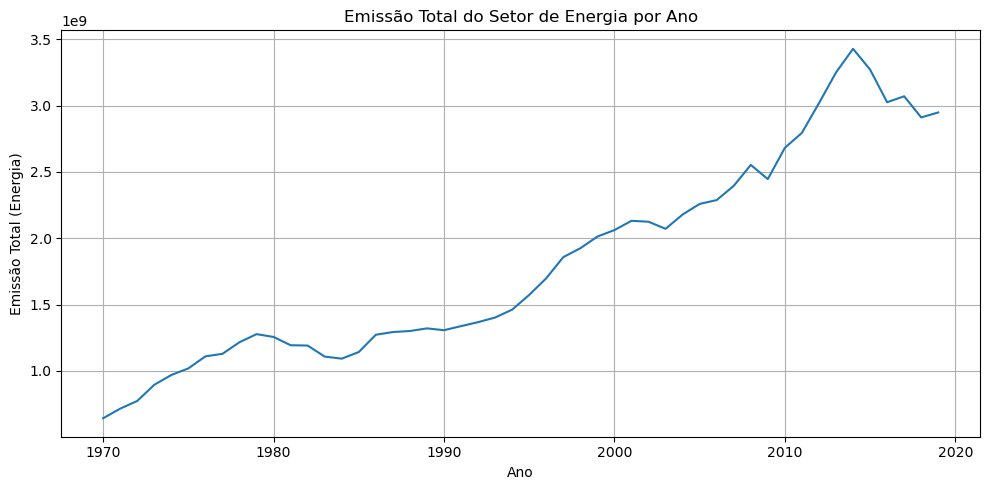

In [24]:
# Visualização de tipos geradores de energia e sua dispoções de gases

# Filtragem por apenas pelo tipo de energia
df_energia = df[df['nivel_1'] == 'Energia'].copy()

# Agrupamento de ano e emissão 
df_ano = df_energia.groupby('ano')['emissao'].sum().reset_index()

# Plotagem do grafico
plt.figure(figsize=(10,5))
plt.plot(df_ano['ano'], df_ano['emissao'])
plt.xlabel("Ano")
plt.ylabel("Emissão Total (Energia)")
plt.title("Emissão Total do Setor de Energia por Ano")
plt.grid(True)
plt.tight_layout()
plt.show()

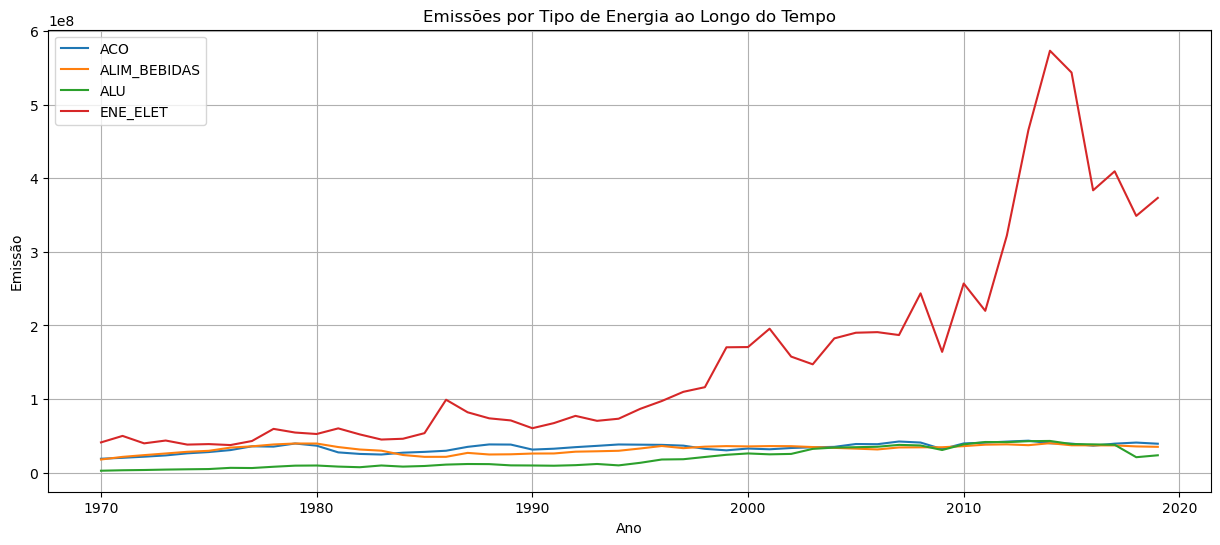

In [25]:
# Agrupamento de ano x produto 
df_pivot = df_energia.pivot_table(
    values='emissao',
    index='ano',
    columns='produto',
    aggfunc='sum',
    fill_value=0
)
# Plotagem do grafico
plt.figure(figsize=(15, 6))
for coluna in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[coluna], label=coluna)

plt.xlabel("Ano")
plt.ylabel("Emissão")
plt.title("Emissões por Tipo de Energia ao Longo do Tempo")
plt.legend()
plt.grid(True)
plt.show()

Podemos ver que a produção de energia eletrica é a mais que gera algum tipo de poluição para geração de algum tipo de energia

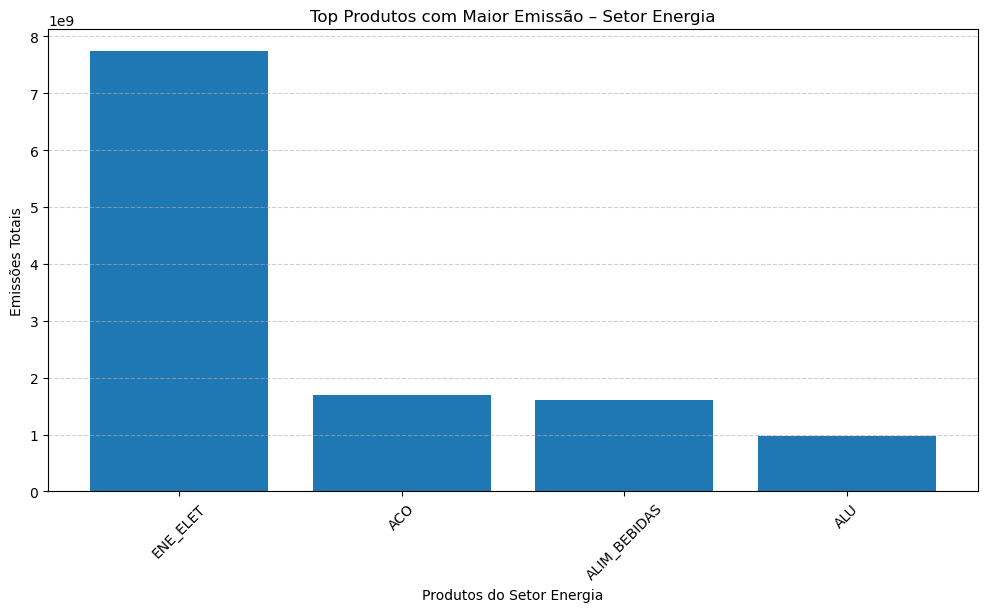

In [26]:
#  Agrupamento de ano e emissão 
emissoes_por_produto = (
    df_energia.groupby('produto')['emissao']
    .sum()
    .sort_values(ascending=False)
)
# Plotagem do grafico
plt.figure(figsize=(12, 6))
plt.bar(emissoes_por_produto.index, emissoes_por_produto.values)

plt.xlabel("Produtos do Setor Energia")
plt.ylabel("Emissões Totais")
plt.title("Top Produtos com Maior Emissão – Setor Energia")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

In [37]:
# O df_erngia ja foi criado ateriormente para criar os graficos
# df_energia = df[df['nivel_1'] == 'Energia'].copy()


# Somar emissões por ano
df_ano = df_energia.groupby('ano')['emissao'].sum().reset_index()

In [38]:
# Ordenar os anos
df_ano = df_ano.sort_values('ano')

In [39]:
# Criação de comportamento temporal usando Lags
# XGBRegressor não é um modelo muito efeciente a series temporaris

df_ano['lag1'] = df_ano['emissao'].shift(1)
df_ano['lag2'] = df_ano['emissao'].shift(2)
df_ano['lag3'] = df_ano['emissao'].shift(3)
df_ano['media_movel'] = df_ano['emissao'].rolling(window=3).mean()
# Remoção dos anos sem lag
df_ano = df_ano.dropna() 

In [40]:
# Separação de Features
X = df_ano[['ano', 'lag1', 'lag2', 'lag3', 'media_movel']]
y = df_ano['emissao']

In [43]:
# Treinamento do modelo 
rf = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


rf.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [44]:
def prever_anos_futuros(modelo, df_hist, anos=3):
    previsoes = []
    df_temp = df_hist.copy()

    for i in range(1, anos+1):
        ultimo_ano = df_temp['ano'].max()  # último ano disponível
        novo_ano = ultimo_ano + 1

        # Preparar features do próximo ano
        lag1 = df_temp['emissao'].iloc[-1]
        lag2 = df_temp['emissao'].iloc[-2]
        lag3 = df_temp['emissao'].iloc[-3]
        media = df_temp['emissao'].iloc[-3:].mean()

        X_novo = pd.DataFrame({
            'ano': [novo_ano],
            'lag1': [lag1],
            'lag2': [lag2],
            'lag3': [lag3],
            'media_movel': [media]
        })

        pred = modelo.predict(X_novo)[0]

        previsoes.append((novo_ano, pred))

        # Adicionar previsão ao histórico para prever o ano seguinte
        df_temp = pd.concat([
            df_temp,
            pd.DataFrame({'ano': [novo_ano], 'emissao': [pred]})
        ], ignore_index=True)

    return previsoes

In [45]:
# Previsões para anos seguintes com base de inicio do dataset
previsoes = prever_anos_futuros(rf, df_ano, anos=3)

for ano, valor in previsoes:
    print(f"Previsão para {ano}: {valor:,.2f}")

Previsão para 2020: 2,943,472,128.00
Previsão para 2021: 2,947,894,016.00
Previsão para 2022: 2,947,894,016.00


O XGBRegressor pode não ser um bom avaliador temporar, mas existem  outros no mercado como ARIMA, SARIMA, Prophet entra os infinitos que podemora chegar em uma previsão melhor.

Mas o modelo executado nos trouxe um bom valor perto do esperado comparando que o grafico tendeu a descer depois de 2014, como ele não se da muito bem a serie temporar.